<a href="https://colab.research.google.com/github/youkjang/Machine-Learning-Deep-Learning-Practice/blob/main/Classification_Churn_ANN_udemy_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network
##  Binary Classification

* **Problem**: The bank noticed the high Churn rate.
* **Data**: The bank collected the information of 1000 customers and waited 6 months to see if which customers leave the bank. This data and problem were created by the Udemy course.
* **Articial Neural Network** is used to predict if customers leave the bank.

* This notebook is based on the Udemy course (Machine Learning A-Z™: Hands-On Python & R In Data Science) https://www.udemy.com/ and Kaggle micro course (Intro to Deep Learning) https://www.kaggle.com/learn/intro-to-deep-learning.
 



### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Selecting features for X and y

In [29]:
col_list = ['CreditScore','Geography','Gender','Age','Tenure','Balance',
            'NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']
X = dataset[col_list]
y = dataset['Exited']

X.shape, y.shape

((10000, 10), (10000,))

### Encoding categorical data

Label Encoding the "Gender" column

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Gender'] = le.fit_transform(X['Gender'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
X.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


One Hot Encoding the "Geography" column

In [41]:
X = pd.get_dummies(X)

In [10]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,1,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,1,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,0,1,0


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state = 0)

### Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
X_test

array([[-0.55204276, -1.09168714, -0.36890377, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.31490297, -1.09168714,  0.10961719, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [ 0.57162971, -1.09168714,  0.30102557, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       ...,
       [-0.74791227,  0.91601335, -0.27319958, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.00566991,  0.91601335, -0.46460796, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-0.79945688,  0.91601335, -0.84742473, ..., -1.01460667,
         1.75486502, -0.57369368]])

## Part 2 - Building the ANN

### Initializing the ANN

In [15]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [16]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu', input_shape=[12]))

### Adding the second hidden layer

In [17]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [18]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the ANN and Validation

### Compiling the ANN

In [19]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set
* Including early stopping callbacks to avoid overfiting
* X_test, y_test used for validation

In [20]:
early_stopping =tf.keras.callbacks.EarlyStopping(
    patience =20,
    min_delta = 0.001,
    restore_best_weights=True,
)

history = ann.fit(X_train, y_train,
                  validation_data = (X_test,y_test),
                  callbacks = [early_stopping],
                  batch_size = 31, 
                  epochs = 100,
                  )

Epoch 1/100
259/259 [==============================] - 1s 3ms/step - loss: 0.5257 - accuracy: 0.7768 - val_loss: 0.4679 - val_accuracy: 0.7970
Epoch 2/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4528 - accuracy: 0.8001 - val_loss: 0.4441 - val_accuracy: 0.7955
Epoch 3/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4452 - accuracy: 0.7975 - val_loss: 0.4335 - val_accuracy: 0.7950
Epoch 4/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4240 - accuracy: 0.8009 - val_loss: 0.4297 - val_accuracy: 0.7970
Epoch 5/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4284 - accuracy: 0.7966 - val_loss: 0.4250 - val_accuracy: 0.8075
Epoch 6/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4296 - accuracy: 0.8064 - val_loss: 0.4182 - val_accuracy: 0.8120
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3993 - accuracy: 0.8275 - val_loss: 0.4159 - val_accuracy: 0.8230

### Evaluating Model

Best Validation Loss: 0.3310
Best Validation Accuracy: 0.8675


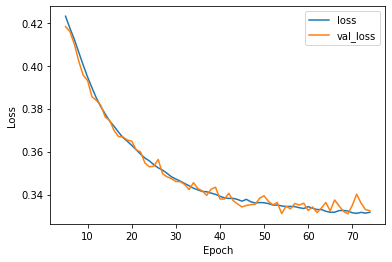

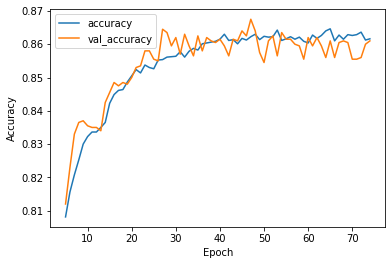

In [37]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot(xlabel='Epoch',ylabel='Loss')
history_df.loc[5:, ['accuracy', 'val_accuracy']].plot(xlabel='Epoch',ylabel='Accuracy')

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_accuracy'].max()))

## Part 4 - Making the predictions

### Predicting the result of a single observation

**Case Problem from Udemy course**

*Let's predict with our ANN model if the customer with the following informations will leave the bank or not.* 

Credit Score: 600

Gender: Male

Age: 40 years old

Tenure: 3 years

Balance: \$ 60000

Number of Products: 2

Does this customer have a credit card ? Yes

Is this customer an Active Member: Yes

Estimated Salary: \$ 50000

Geography: France

*So, do we expect him to leave the bank?*

**Solution**
* In training data, last three columns are for Geography.
France = [1,0,0], Germany = [0,1,0], Spain = [0,0,1]

In [40]:
print(ann.predict(sc.transform([[600, 1, 40, 3, 60000, 2, 1, 1, 50000,1,0,0]])) > 0.5)

[[False]]


The ANN model predicts that this customer stays in the bank.

